In [3]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.0


In [4]:
def plot_variant_hist(x, f, bins=30, xlim=100):
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_xlim(0, xlim)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

## FN 30

In [5]:
file = "/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/intermediates/FN30_combined_sorted.vcf"

In [6]:
allel.vcf_to_hdf5(file,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/intermediates/FN30_combined_sorted.h5',
                  fields='*',
                  overwrite=True)

In [7]:
callset = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/intermediates/FN30_combined_sorted.h5', mode='r')

In [8]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [9]:
np.percentile(variants['DP'][:], 50)

1994.0

In [17]:
np.percentile(callset['calldata/DP'], 3)

3.0

In [10]:
np.percentile(callset['calldata/DP'], 50)

21.0

In [11]:
np.percentile(callset['calldata/DP'], 95)

38.0

In [12]:
np.percentile(callset['calldata/DP'], 98)

45.0

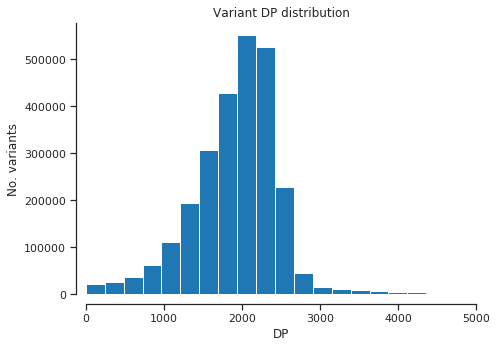

In [13]:
DP = variants['DP'][:]
plot_variant_hist(DP, 'DP', bins=3000, xlim=5000)

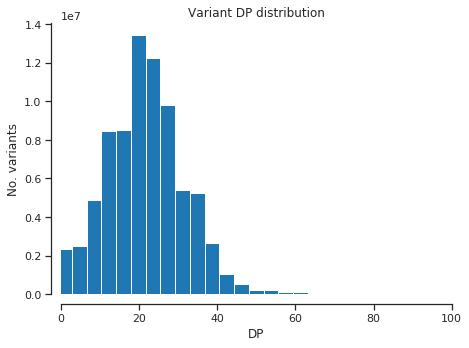

In [14]:
plot_variant_hist(callset['calldata/DP'][:,:].flatten(), 'DP', bins=1500)

In [1]:
%%bash
jupyter nbconvert  --to=html 'Depth_Filtering_3.6.ipynb'

[NbConvertApp] Converting notebook Depth_Filtering_3.6.ipynb to html
[NbConvertApp] Writing 283069 bytes to Depth_Filtering_3.6.html
